<a href="https://colab.research.google.com/github/RaymanPython/ASTRO/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas


In [ ]:
!pip install matplotlib


Статистические сведения о студентах:
       Предмет 1  Предмет 2  Предмет 3  Общий балл
count  12.000000  12.000000  12.000000   12.000000
mean   53.833333  36.333333  45.916667  136.083333
std    31.440661  18.232505  33.216804   43.477180
min     0.000000   7.000000   1.000000   65.000000
25%    21.750000  28.750000  28.000000  101.000000
50%    63.500000  32.500000  44.000000  144.000000
75%    76.250000  45.750000  61.750000  167.750000
max    99.000000  69.000000  99.000000  202.000000

Студент с максимальным общим баллом:
Группа                 Группа 11
ФИО           Студент 2 Группа 4
Предмет 1                     77
Предмет 2                     34
Предмет 3                     91
Общий балл                   202
Name: 10, dtype: object

Студент с минимальным общим баллом:
Группа                  Группа 9
ФИО           Студент 3 Группа 3
Предмет 1                     17
Предмет 2                      7
Предмет 3                     41
Общий балл                    65
Name: 8, 

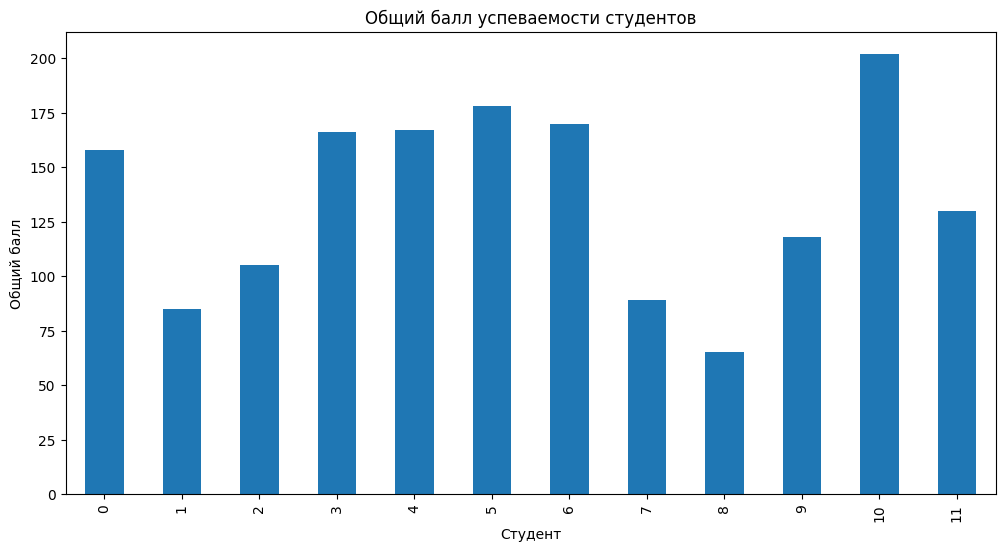

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Создаем набор данных с 4 группами, по 3 студента в каждой
data = {
    'Группа': [f'Группа {i+1}' for i in range(12)],
    'ФИО': [f'Студент {i+1} Группа {j+1}' for j in range(4) for i in range(3)],
    'Предмет 1': [random.randint(0, 100) for _ in range(12)],
    'Предмет 2': [random.randint(0, 100) for _ in range(12)],
    'Предмет 3': [random.randint(0, 100) for _ in range(12)],
    'Общий балл': [0 for _ in range(12)]
}

# Создаем DataFrame из набора данных
df = pd.DataFrame(data)

# Вычисляем общий балл для каждого студента
df['Общий балл'] = df['Предмет 1'] + df['Предмет 2'] + df['Предмет 3']

# Выводим статистические сведения о студентах
print("Статистические сведения о студентах:")
print(df.describe())
print()

# Находим студента с максимальным общим баллом
max_student = df.loc[df['Общий балл'].idxmax()]
print("Студент с максимальным общим баллом:")
print(max_student)
print()

# Находим студента с минимальным общим баллом
min_student = df.loc[df['Общий балл'].idxmin()]
print("Студент с минимальным общим баллом:")
print(min_student)
print()

# Находим информацию о студенте по его фамилии
name = input("Введите фамилию студента: ")
student_info = df[df['ФИО'].str.contains(name)]
print(f"Информация о студенте {name}:")
print(student_info)
print()

# Выводим информацию по успеваемости одной группы
group_num = int(input("Введите номер группы (1-4): "))
group_info = df[df['Группа'] == f'Группа {group_num}']
print(f"Информация по успеваемости группы {group_num}:")
print(group_info)
print()

# Строим диаграмму по общему баллу успеваемости студентов
plt.figure(figsize=(12, 6))
df['Общий балл'].plot(kind='bar')
plt.title('Общий балл успеваемости студентов')
plt.xlabel('Студент')
plt.ylabel('Общий балл')
plt.show()


In [ ]:
import pandas as pd

# Загрузка данных из файла Excel
df = pd.read_excel('100_best_books.xlsx')

# Сортировка списка по названию книги
df = df.sort_values('Название')

# Вывод 10 книг с наибольшим количеством голосов
print("10 книг с наибольшим количеством голосов:")
print(df.nlargest(10, 'Голоса'))
print()

# Вывод данных за 1870-1900 года
print("Данные за 1870-1900 года:")
print(df[(df['Год'] >= 1870) & (df['Год'] <= 1900)])
print()

# Вывод количества книг каждого автора
print("Количество книг каждого автора:")
print(df.groupby('Автор')['Название'].count().sort_values(ascending=False))
print()

# Вывод книг со средним баллом выше 2
print("Книги со средним баллом выше 2:")
print(df[df['Средний балл'] > 2])
print()

# Вывод произведений автора по введенному имени
author_name = input("Введите имя автора: ")
author_books = df[df['Автор'].str.contains(author_name)]
print(f"Произведения автора {author_name}:")
print(author_books)
print()

# Построение диаграммы количества книг каждого автора
df.groupby('Автор')['Название'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Количество книг каждого автора')
plt.xlabel('Автор')
plt.ylabel('Количество книг')
plt.show()


In [ ]:
!pip install requests

In [6]:
import requests

city = input('Введите название города: ')
appid = '1520f34cb52423e681e32deeec936c11'
api = f'https://api.openweathermap.org/data/2.5/weather?appid={appid}&q={city}'

resp = requests.get(api)
resp = resp.json()
print(resp)
if resp['cod'] == '404':
    print(f"Город '{city}' не найден.")
else:
    current_temp = resp['main']['temp']
    celsius_temp = round(current_temp - 273.15)
    print(f"Текущая температура в городе {city}: {celsius_temp}°C")


Введите название города: Москва
{'coord': {'lon': 37.6156, 'lat': 55.7522}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.34, 'feels_like': 301.18, 'temp_min': 302.09, 'temp_max': 302.9, 'pressure': 1015, 'humidity': 30, 'sea_level': 1015, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 4.26, 'deg': 84, 'gust': 5.22}, 'clouds': {'all': 86}, 'dt': 1717241873, 'sys': {'type': 2, 'id': 2000314, 'country': 'RU', 'sunrise': 1717203185, 'sunset': 1717264924}, 'timezone': 10800, 'id': 524901, 'name': 'Moscow', 'cod': 200}
Текущая температура в городе Москва: 29°C
